In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
from pprint import pprint

In [2]:
"""
cook – how often do you cook?
1 - Every day 
2 - A couple of times a week 
3 - Whenever I can, but that is not very often  
4 - I only help a little during holidays 
5 - Never, I really do not know my way around a kitchen
"""

"""
eating_out - frequency of eating out in a typical week 
1 - Never 
2 - 1-2 times 
3 - 2-3 times 
4 - 3-5 times 
5 - every day
"""

"""
employment – do you work? 
1 - yes full time 
2 - yes part time 
3 – no
4  - other
"""

"""
ethnic_food - How likely to eat ethnic food 
1 - very unlikely 
2 - unlikely 
3 - neutral 
4 - likely 
5 - very likely 
"""

"""
exercise – how often do you exercise in a regular week?
1 - Everyday 
2 - Twice or three times per week 
3 - Once a week
4 - Sometimes 
5 – Never
"""

"""
fruit_day - How likely to eat fruit in a regular day 
1 - very unlikely 
2 - unlikely 
3 - neutral 
4 - likely 
5 - very likely 
"""

"""
1 - less than $15,000 
2 - $15,001 to $30,000 
3 - $30,001 to $50,000 
4 - $50,001 to $70,000 
5 - $70,001 to $100,000 
6 - higher than $100,000
"""

"""
on_off_campus – living situation
1 - On campus 
2 - Rent out of campus 
3 - Live with my parents and commute 
4 - Own my own house
"""

"""
pay_meal_out - How much would you pay for meal out? 
1 - up to $5.00 
2 - $5.01 to $10.00 
3 - $10.01 to $20.00 
4 - $20.01 to $30.00 
5 - $30.01 to $40.00 
6 - more than $40.01
"""

"""
sports - sports – do you do any sporting activity?
1 - Yes 
2 - No 
99 – no answer
"""

"""
veggies_day - How likely are you tolikely to eat veggies in a day? 
1 - very unlikely 
2 - unlikely 
3 - neutral 
4- likely 
5 - very likely
"""

'\nveggies_day - How likely are you tolikely to eat veggies in a day? \n1 - very unlikely \n2 - unlikely \n3 - neutral \n4- likely \n5 - very likely\n'

In [3]:
data=pd.read_csv('./food_coded.csv')

In [4]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [5]:
df = data[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [7]:
df.shape

(125, 11)

In [8]:
df.describe()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
count,122.000000,125.00000,116.000000,125.000000,112.000000,125.000000,124.000000,124.000000,125.000000,123.000000,125.000000
mean,2.786885,2.56000,2.448276,3.744000,1.589286,4.224000,4.532258,1.322581,3.408000,1.390244,4.008000
std,1.038351,1.13876,0.533158,1.177093,0.665137,0.923388,1.456332,0.681323,1.040285,0.489800,1.081337
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.00000,2.000000,3.000000,1.000000,4.000000,4.000000,1.000000,3.000000,1.000000,3.000000
50%,3.000000,2.00000,2.000000,4.000000,1.000000,5.000000,5.000000,1.000000,3.000000,1.000000,4.000000
75%,3.000000,3.00000,3.000000,5.000000,2.000000,5.000000,6.000000,1.000000,4.000000,2.000000,5.000000
max,5.000000,5.00000,3.000000,5.000000,3.000000,5.000000,6.000000,4.000000,6.000000,2.000000,5.000000


In [9]:
df.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [10]:
df.loc[:,'income']=df.loc[:,'income'].fillna(value=df['income'].mean())
df.loc[:,'sports']=df.loc[:,'sports'].fillna(value=df['sports'].mean())
df.loc[:,'on_off_campus']=df.loc[:,'on_off_campus'].fillna(value=df['on_off_campus'].mean())
df.loc[:,'cook']=df.loc[:,'cook'].fillna(value=df['cook'].mean())
df.loc[:,'exercise']=df.loc[:,'exercise'].fillna(value=df['exercise'].mean())
df.loc[:,'employment']=df.loc[:,'employment'].fillna(value=df['employment'].mean())

In [11]:
df.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [12]:
cols=df.columns

for i in range(len(cols)):
    print(f'{cols[i]} : {df[cols[i]].dtype}')

cook : float64
eating_out : int64
employment : float64
ethnic_food : int64
exercise : float64
fruit_day : int64
income : float64
on_off_campus : float64
pay_meal_out : int64
sports : float64
veggies_day : int64


In [13]:
df = df.astype('int64')

In [77]:
cols=df.columns

for i in range(len(cols)):
    print(f'{cols[i]} : {df[cols[i]].dtype}')

cook : int64
eating_out : int64
employment : int64
ethnic_food : int64
exercise : int64
fruit_day : int64
income : int64
on_off_campus : int64
pay_meal_out : int64
sports : int64
veggies_day : int64


In [15]:
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2,3,3,1,1,5,5,1,2,1,5
1,3,2,2,4,1,4,4,1,4,1,4
2,1,2,3,5,2,5,6,2,3,2,5
3,2,2,3,5,3,4,6,1,2,2,3
4,1,2,2,4,1,4,6,1,4,1,4


<b style='font-size:19px'>Univariate Analysis</b>

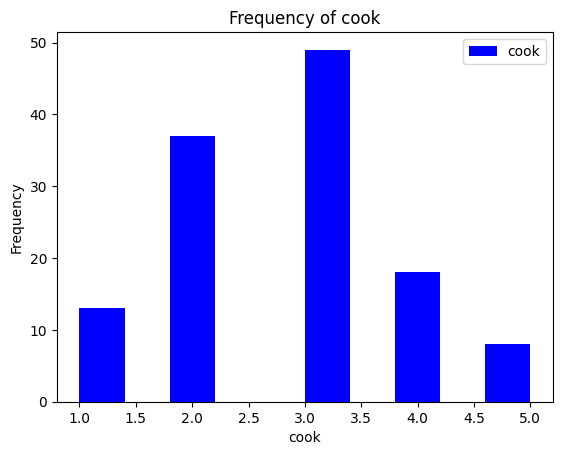

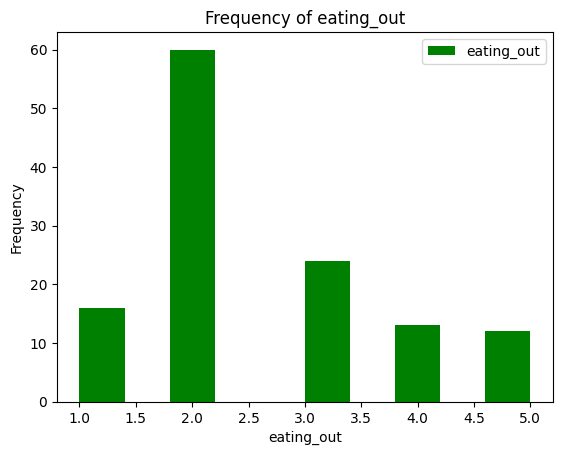

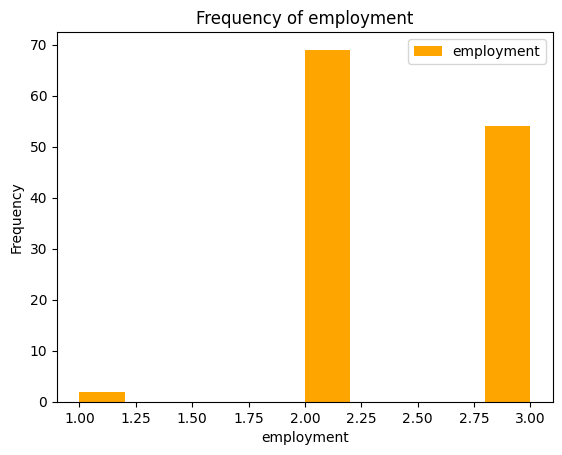

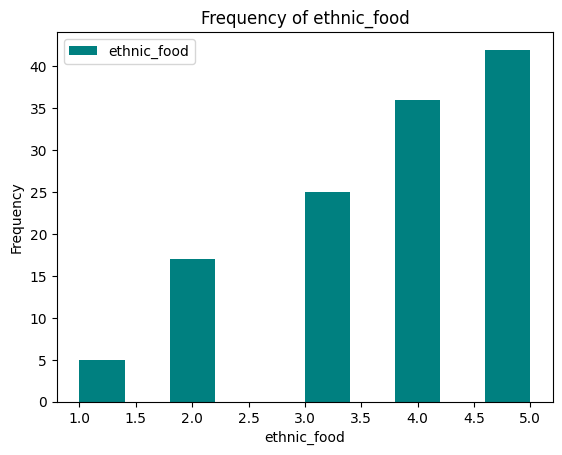

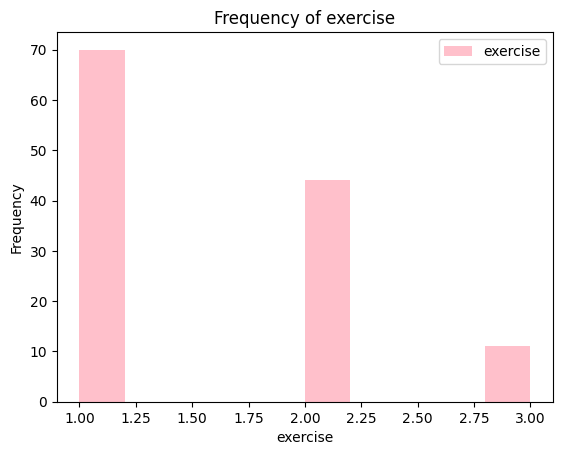

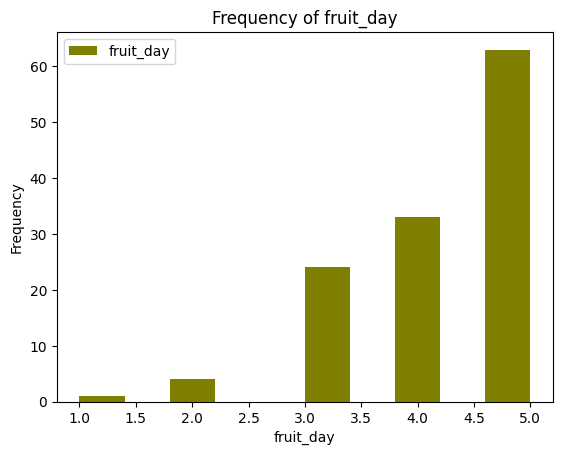

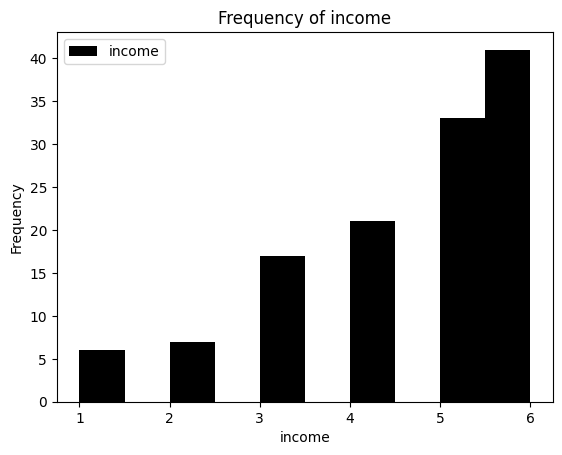

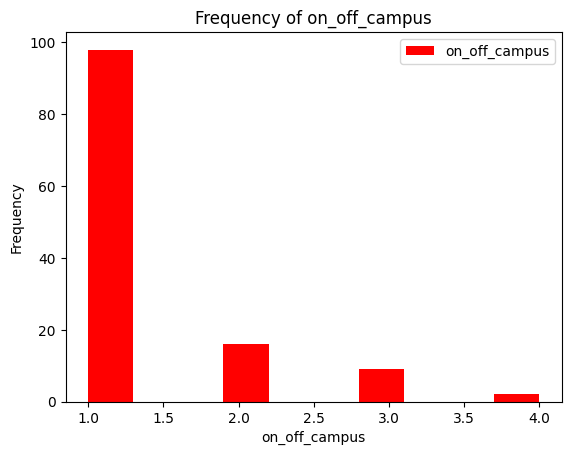

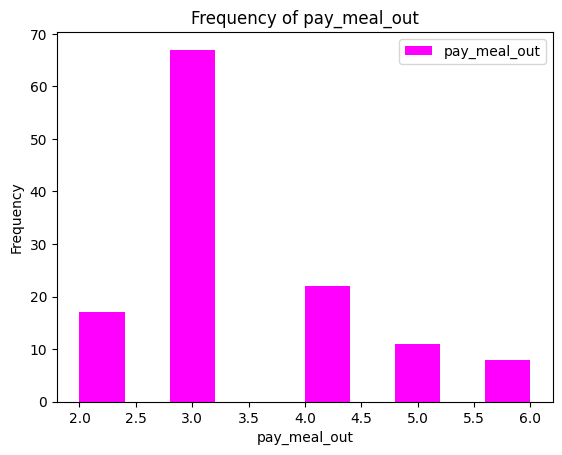

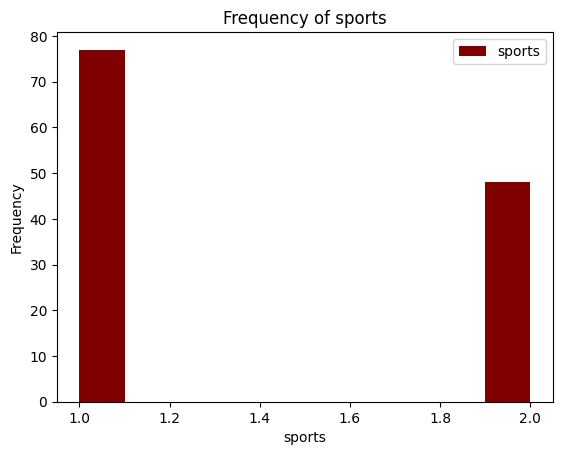

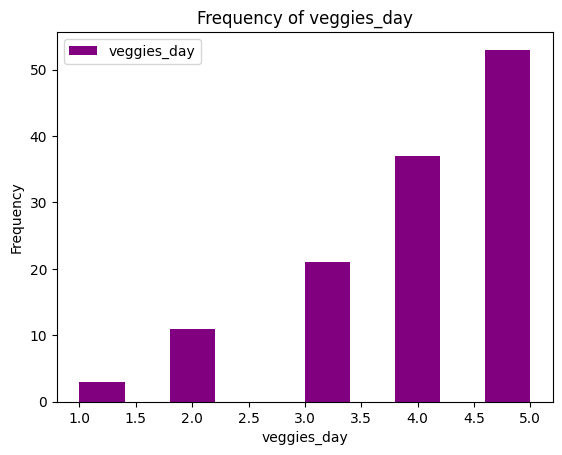

In [16]:
colors = ['blue','green','orange','teal','pink','olive','black','red','magenta','maroon','purple']

for i in range(len(cols)):
    df[[cols[i]]].plot(kind='hist',color=colors[i])
    plt.xlabel(cols[i])
    plt.title(f'Frequency of {cols[i]}')

<b style="font-size:17px">Observations from the above Histograms</b>
<b style="font-size:16px">
<ul>
<li>Most of the people cook food whenever they can but not often.</li>
<li>Many people eats outside food 1-2 times a week.</li>
<li>The employment of many people are part time.</li>
<li>People likely prefers to take ethnic food.</li>
<li>Many people exercises every day.</li>
<li>People are likely to take fruits every day</li>
<li>Many people have an average income of $85000.</li>
<li>Most of the people lives in campus</li>
<li>Most of the people spends on an average of $15 for outside meals.</li>
<li>Most of the people are engaged in any sports.</li>
<li>People are very interested to eat veggies in a day.</li>
</ul>
</b>

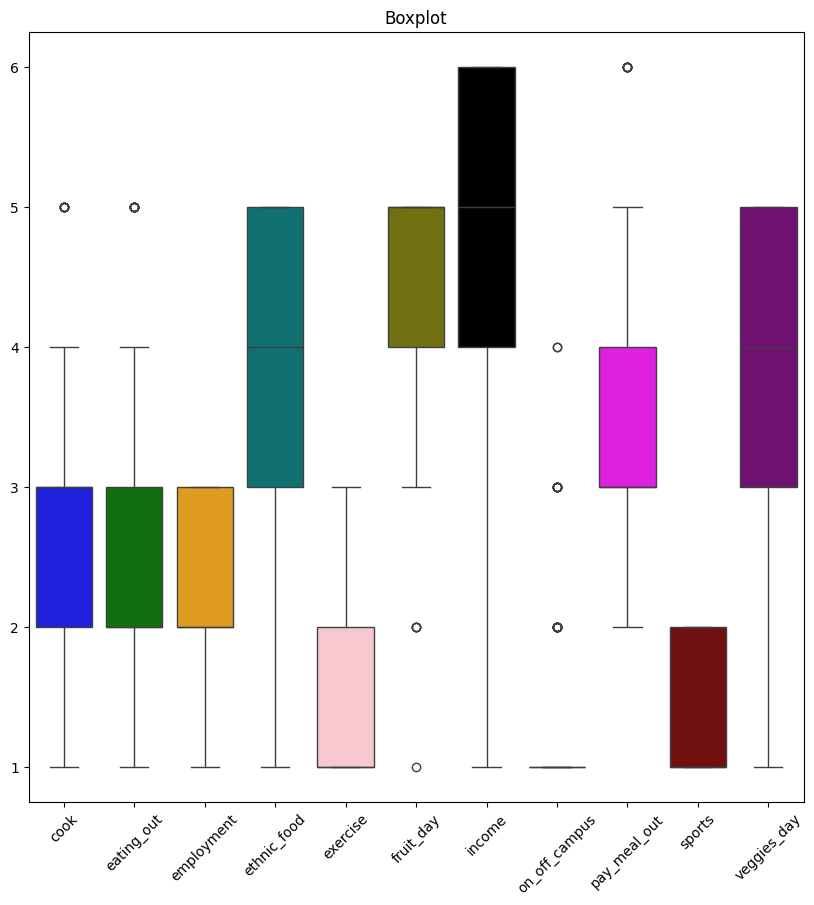

In [17]:
plt.figure(figsize=(10,10))
for i in range(len(cols)):    
    sns.boxplot(df[[cols[i]]],color=colors[i])
    plt.xticks(rotation=45)
plt.title(f'Boxplot');

<b style='font-size:19px'>Bivariate Analysis</b>

In [18]:
from sklearn.cluster import KMeans

x = df.values

In [19]:
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=6)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

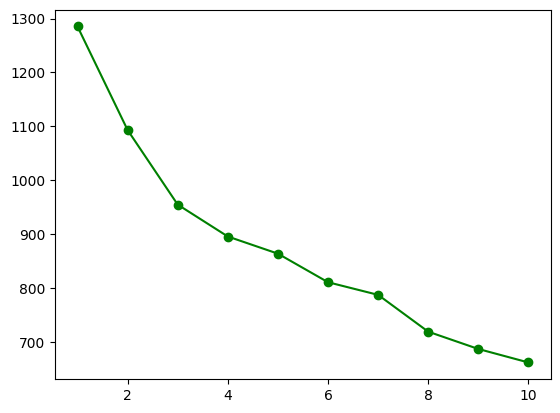

In [20]:
plt.plot([i for i in range(1,11)],wcss,marker='o',color='g');

In [21]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=6)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=6)

In [22]:
y_pred = kmeans.predict(x)

In [24]:
url = "https://maps-data.p.rapidapi.com/nearby.php"

params = {
    'query':'apartments',
    'lat':'12.9716',
    'lng':'77.5946',
    'limit':'125',
    'country':'india',
    'lang':'en',
    'zoom':'12'
}

headers = {
    "X-RapidAPI-Key": "238768ee71mshcfd2270700c8ea4p169ed6jsnf8a59efee43f",
	"X-RapidAPI-Host": "maps-data.p.rapidapi.com"
}

response = requests.get(url=url,params=params,headers=headers)

result = response.json()

In [25]:
names = []
latitude = []
longitude = []

for i in range(len(result['data'])):
    name = result['data'][i]['name']
    lat = result['data'][i]['latitude']
    lng = result['data'][i]['longitude']

    names.append(name)
    latitude.append(lat)
    longitude.append(lng)

In [26]:
data = pd.DataFrame(data=dict({'location':names,'latitude':latitude,'longitude':longitude}))

In [46]:
pred = pd.DataFrame(data=y_pred)

pred.rename(columns={0:'pred'},inplace=True)

In [75]:
final_df = pd.concat([df,data,pred],axis=1)

final_df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,location,latitude,longitude,pred
0,2,3,3,1,1,5,5,1,2,1,5,Prestige Luxury Apartments,12.973073,77.597087,2
1,3,2,2,4,1,4,4,1,4,1,4,Garden Apartments,12.971053,77.597139,0
2,1,2,3,5,2,5,6,2,3,2,5,Sunningdale,12.970489,77.596177,2
3,2,2,3,5,3,4,6,1,2,2,3,Van Gogh's Garden [Total Environment],12.973819,77.597161,2
4,1,2,2,4,1,4,6,1,4,1,4,Stanmore Apartments,12.970292,77.599052,0


In [72]:
import folium

mymap = folium.Map(location=[12.9716,77.5946],zoom_start=15)

coordinates = [tuple([i,j]) for i,j in zip(latitude,longitude)]


for i in range(len(df)):
    if(final_df.loc[i,'pred']==0):
        folium.Marker(location=coordinates[i],icon=folium.Icon(color='green',icon='home'),popup=final_df['location'].values[i]).add_to(mymap)
    elif(final_df.loc[i,'pred']==1):
        folium.Marker(location=coordinates[i],icon=folium.Icon(color='blue',icon='home'),popup=final_df['location'].values[i]).add_to(mymap)
    elif(final_df.loc[i,'pred']==2):
        folium.Marker(location=coordinates[i],icon=folium.Icon(color='red',icon='home'),popup=final_df['location'].values[i]).add_to(mymap)
    else:
        folium.Marker(location=coordinates[i],icon=folium.Icon(color='orange',icon='home'),popup=final_df['location'].values[i]).add_to(mymap)

In [73]:
mymap

In [74]:
mymap.save('geolocational_data_analysis.html')